In [3]:
import numpy as np
import torch
from torch.utils.data import Dataset
import os
import cv2
from histology_dataset import histologyDataset
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from torchvision import transforms, utils
from augs import *

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset = histologyDataset("./histology_dataset/20/train/images/", "./histology_dataset/20/train/GT/", color=True, transform=transforms.Compose([Brightness(100), ToTensor(), Resize(size=(256, 256))]))

/home/sriramv/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


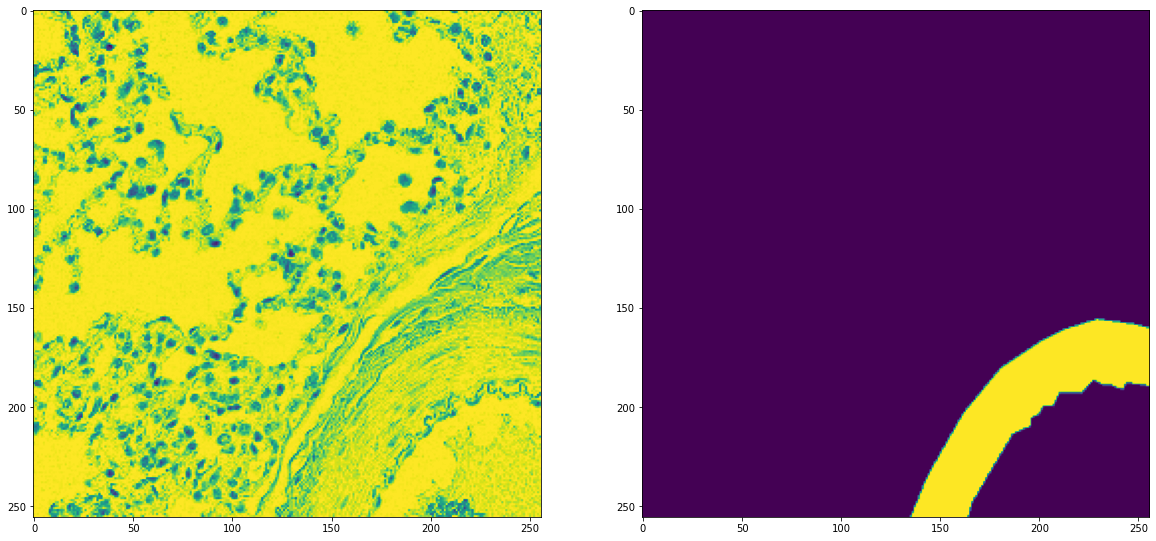

In [6]:
data = dataset[0]
image = data['image'].numpy()
mask = data['mask'].numpy()
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(image[0])
axs[1].imshow(mask[-1])

In [22]:
class Rotate2(object):
    """Randomly rotate a batch by some multiple of 90 degrees"""
    
    def __call__(self, sample):

        im = sample['image']
        mask = sample['mask']

        deg = random.choice([0, 1, 2, 3])
        print(deg)
        
        return {'image':np.rot90(im,k=deg, axes=(1, 2)),
                'mask':np.rot90(mask,k=deg, axes=(1, 2))
                }

3


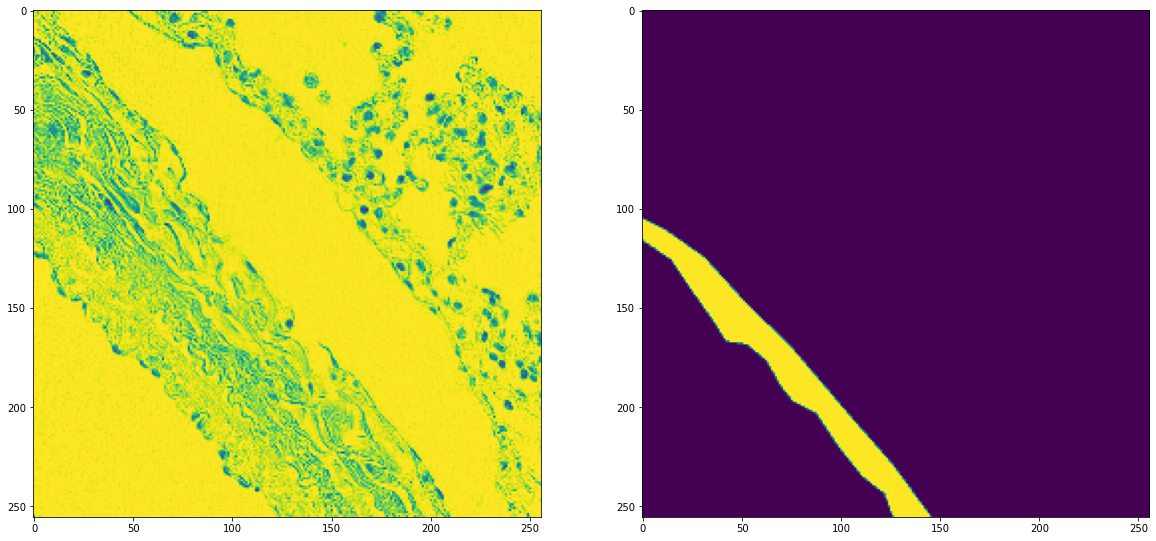

In [20]:
rot = Rotate2()
data = rot(dataset[0])
image = data['image']
mask = data['mask']
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(image[0])
axs[1].imshow(mask[7])

In [15]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

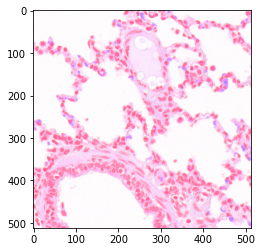

In [57]:
image = cv2.imread("histology_dataset/20/train/images/11.png")
plt.imshow(increase_brightness(image, value=10000))

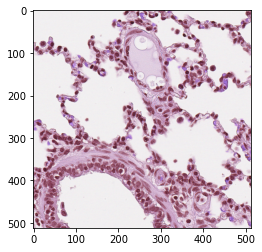

In [41]:
plt.imshow(image)

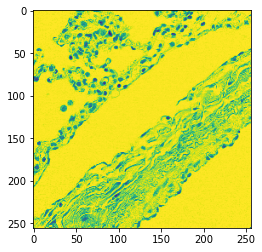

In [7]:
plt.imshow(image[0])

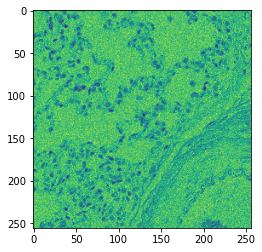

In [17]:
plt.imshow(image[0]+np.random.normal(0, 0.05, image.shape)[0])

In [18]:
class Noise(object):
    """Randomly rotate a batch by some multiple of 90 degrees"""
    
    def __init__(self, sigma):
        self.sigma = sigma
    
    def __call__(self, sample):

        im = sample['image']
        mask = sample['mask']
        
        return {'image':im++np.random.normal(0, 0.05, im.shape),
                'mask':mask
                }